In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


"""
The ODE we want to solve has the following form:
	g*V*(p_atm-p_He)-(m_b+m_p)*g+(1/2)*p_atm*y'^2*c_d*S = (m_He+m_b+m_p)*y''
To solve this second order ODE, we can go a change of variable z=y';
	g*V*(p_atm-p_He)-(m_b+m_p)*g+(1/2)*p_atm*z^2*c_d*S = (m_He+m_b+m_p)*z'
"""

#Balloon specs

#Radius of the balloon:
r = 6
#Mass of ballon:
m_b=0.6
#Mass of payload:
m_p=0.5



#Physical parameter:

#Gravity of the Earth
g = 9.81
#Volume occupied by the balloon
V = (4/3*np.pi*r**3)
#density of helium
p_He=0.178     #kg/m^3
#Mass of Helium:
m_He=V*p_He
#density of air:
p_atm=1.2 #kg/m^3
#Reynold's constant
c_d=1
#Area of balloon
S=4*np.pi*r**2

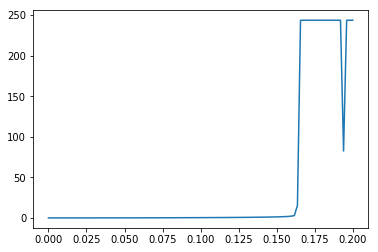

In [41]:
def d(z,t):
	"""
	Function that takes a derivative of the vector U=[y,z]. Therefore, it should return [y',z']
	"""
	return np.array(((g*V*(p_atm-p_He)-(m_b+m_p)*g+(1/2)*p_atm*z[0]**2*c_d*S)/(m_He+m_b+m_p),
                    z[0]
                   ))

                     
#Initial condition
U0=[0,0]
ts = np.linspace(0,0.2,100)
_, y = odeint(d,U0,ts).T
plt.plot(ts,y)
plt.show()